In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, select

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).first()

('2017-08-23',)

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
previous=dt.date(2017,8,23)-dt.timedelta(days=365)
previous
results=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >=previous).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [51]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
precip_df = pd.DataFrame(results, columns=['measurement_date', 'precipitation'])
precip_df.dropna(axis=0, how='any', inplace= True)
precip_df.sort_values(by='measurement_date')
precip_df.set_index('measurement_date', inplace=True)
precip_df.head()

,precipitation
measurement_date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


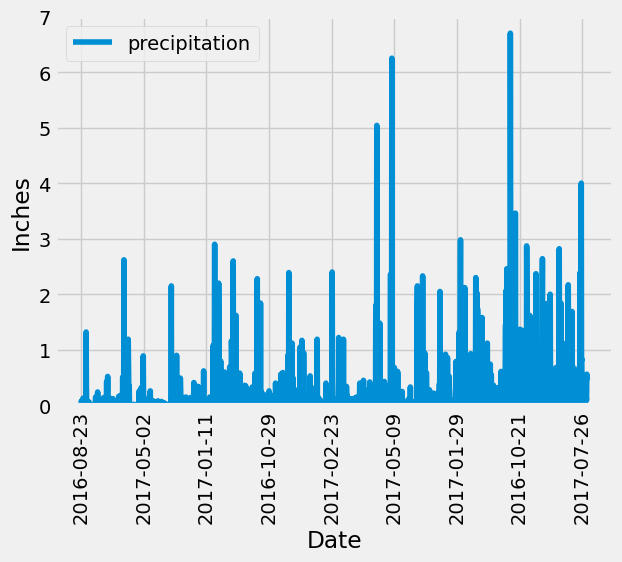

In [52]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation_amount
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [32]:
# Design a query to calculate the total number of stations in the dataset
total_stations= session.query(Station.station).count()
total_stations

9

In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all() 

print(active_stations) 

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).first()
most_active

('USC00519281', 2772)

In [45]:
most_active_station_number = most_active[0]
most_active_station_number 

'USC00519281'

In [48]:
lowest_temp = session.query(func.min(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()
lowest_temp

[(54.0,)]

In [49]:
highest_temp = session.query(func.max(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()
highest_temp

[(85.0,)]

In [50]:
avg_temp = session.query(func.avg(Measurement.tobs)).\
  filter(Measurement.station==most_active_station_number).all()
avg_temp

[(71.66378066378067,)]

In [54]:
most_recent_date = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-18', 79.0)

In [58]:
twelve_month_vals = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == most_active_station_number).\
    filter(Measurement.date > '2016-08-17').all()
twelve_month_tobs_df = pd.DataFrame(twelve_month_vals)["tobs"]
twelve_month_tobs_df

0      80.0
1      79.0
2      81.0
3      79.0
4      78.0
       ... 
352    77.0
353    77.0
354    76.0
355    76.0
356    79.0
Name: tobs, Length: 357, dtype: float64

(0.0, 70.0)

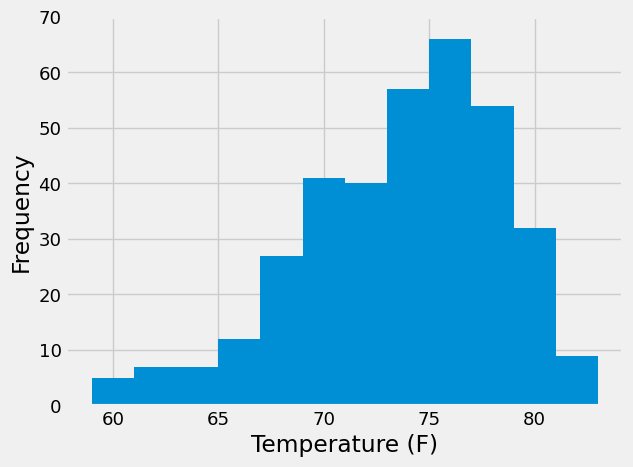

In [77]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist = twelve_month_tobs_df.hist(bins=12) 
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.ylim(0,70)

# Close Session

In [78]:
# Close Session
session.close()